## Node Inspection

For this, we'll throw together a bare-bones network representing a straight-line, *directed* path from `1` to `4`, peppering in weights along the edges.

In [1]:
%pylab inline
import networkx as nx

F = nx.DiGraph()
F.add_weighted_edges_from([(1, 2, .3), (2, 3, .4), (3, 4, .5)])

Populating the interactive namespace from numpy and matplotlib


Simple stuff, yeah?

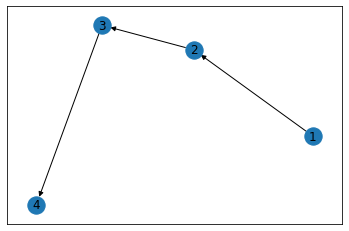

In [2]:
nx.draw_networkx(F)

Here, we built `F` with simple integers, but we could have just as easily used `str` or any other hashable type.

In [3]:
F.nodes

NodeView((1, 2, 3, 4))

Now, if we want to drill in to any particular node, we can simply subscript the Graph object by it's node label

In [4]:
F[2]

AtlasView({3: {'weight': 0.4}})

As you can see, this only gives us a partial picture-- namely the *outbound* edge(s) and the relevant edge attributes.

If instead, we wanted to see everything-- incoming and outgoing-- we'd use the `nx.all_neighbors()` method

In [5]:
list(nx.all_neighbors(F, 2))

[1, 3]

However you'll notice that we lost the convenience of getting the edge attribute, automagically

### A Less-Simple Dataset

In order to dive into more macro measures, we'll import the canonical Graph Dataset that analyzes the social network of a karate class.

In [6]:
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

Inspecting the type of `G`, we can see that it's a `Graph` (as opposed to a *directional* graph) and therefore the edge that connects two nodes doesn't have any inherent direction associated to it.

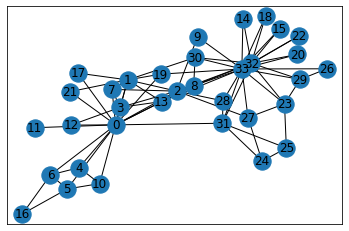

In [7]:
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos)

### Clustering

Quoting the book, "Some social theories consider triads essential units of social network analysis." So what does that mean?

Well, I actually found this to be a little counter-intuitive.

For starters, let's look at a random node in our network, `15`. It's kinda hanging out on its own, only sharing a connection with two other nodes

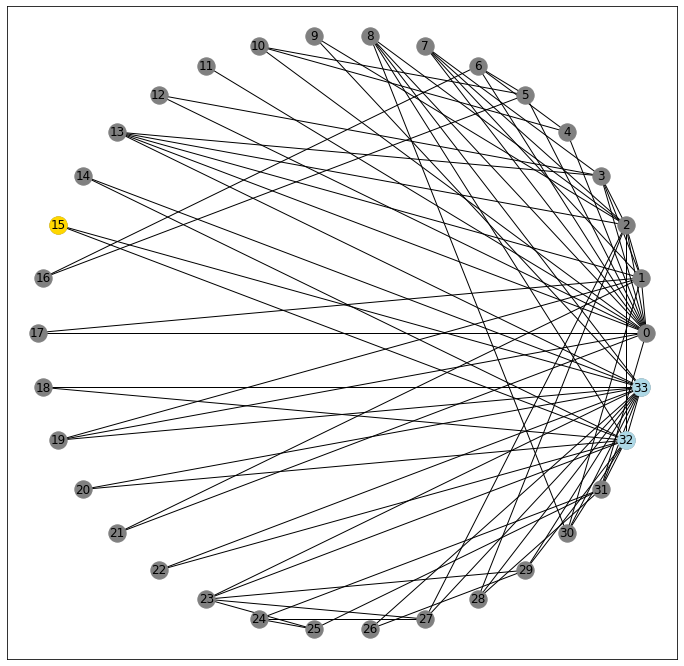

In [8]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(G, pos=pos, ax=ax, node_color='gray')
nx.draw_networkx_nodes(G, pos=pos, nodelist=[15], node_color='gold');
nx.draw_networkx_nodes(G, pos=pos, nodelist=G[15], node_color='lightblue');

32 and 33

In [9]:
G[15]

AtlasView({32: {}, 33: {}})

Critically, however, these two nodes are *also* connected to one another

In [10]:
33 in G[32]

True

In [11]:
32 in G[33]

True

And so in this un-directed graph, you could potentially cycle through the *triangle* `15-32-33-15...` forever.

On the other hand, consider node 9. It *also* only connects to two nodes

In [12]:
G[9]

AtlasView({2: {}, 33: {}})

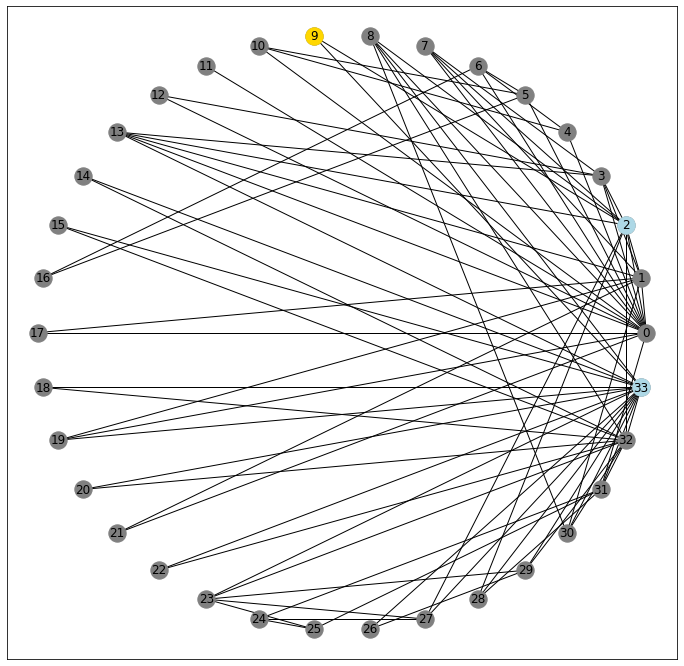

In [13]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(G, pos=pos, ax=ax, node_color='gray')
nx.draw_networkx_nodes(G, pos=pos, nodelist=[9], node_color='gold');
nx.draw_networkx_nodes(G, pos=pos, nodelist=G[9], node_color='lightblue');

But as you might be able to see from the picture, its neighbors *aren't* connected.

In [14]:
33 in G[2]

False

In [15]:
2 in G[33]

False

So what does this mean?

Well, in the context of (social) networks, a node's `clustering coefficient` is a measure of "what percent of all possible triangles exist between a node and all possible pairs of adjacent nodes?"

That's a mouthful. Let's try and unpack a little. We'll do this by looking more closely at a more middle-of-the-road node. Here, I've gotten each node's clustering coefficient and I spy that node `10` will probably give us what we're after.

In [16]:
print(nx.clustering(G))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


It's got three neighbors

In [17]:
G[10]

AtlasView({0: {}, 4: {}, 5: {}})

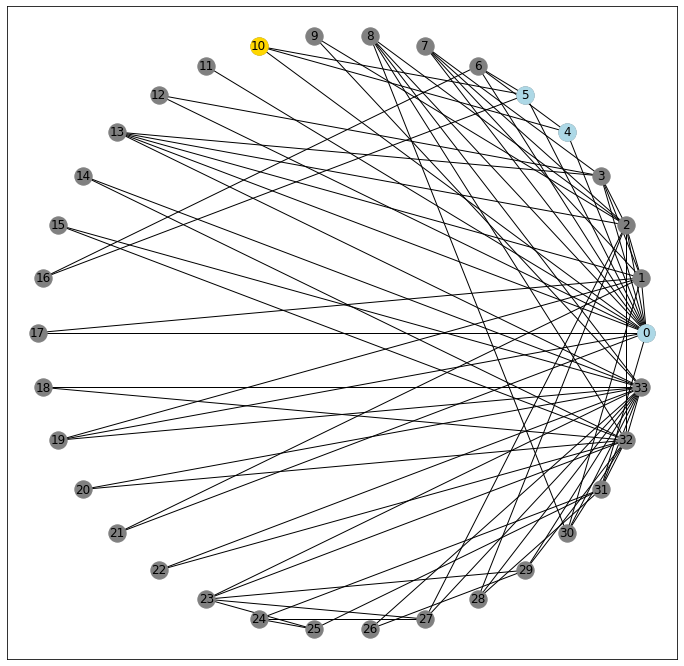

In [18]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(G, pos=pos, ax=ax, node_color='gray')
nx.draw_networkx_nodes(G, pos=pos, nodelist=[10], node_color='gold');
nx.draw_networkx_nodes(G, pos=pos, nodelist=G[10], node_color='lightblue');

Which makes for a possibility of `3-choose-2` possible triangle pairs:

```
0, 4
0, 5
4, 5
```

Examining each pair for connectivity, we get 2/3 of the neighboring connections, and therefore 2/3 of the possible triangles realized.

In [19]:
0 in G[4]

True

In [20]:
0 in G[5]

True

In [21]:
4 in G[5]

False

Therefore, node `10` has a connectivity coefficient of .6666

### Transitivity

Taken as a whole, the `transitivity` of a network, gives you a one-shot look at "number of triangles / number of all possible triangles"

In [22]:
nx.transitivity(G)

0.2556818181818182

### Density

Another, similar measure of "how interconnected is my network" is its `density`.

To work this out we'll start with the fact that there are 34 nodes in our Graph

In [23]:
len(G.nodes)

34

and therefore, are 561 possible pairs of nodes (assuming `(m, n) == (n, m)` in an undirected graph).

In [24]:
34*33/2

561.0

Looking at our data, we can see there are 78 lines connecting pairs of data, `edges`

In [25]:
num_edges = len(nx.edges(G))
num_edges

78

And therefore 483 `non_edges` between all of the other pairs that *don't* share an edge

In [26]:
num_non_edges = len(list(nx.non_edges(G)))
num_non_edges

483

Which is to say that all possible pairs in our graph are accounted for, between `edges` and `non_edges`

In [27]:
561 == (num_edges + num_non_edges)

True

Therefore, we can define the `density` of our Graph as "the ratio of connected pairs to all possible pairs in the network".

The Karate Graph has a density of approximately .14, which we can calculate manually

In [28]:
78/(78+483)

0.13903743315508021

or use the function provided by `networkx`

In [29]:
nx.density(G)

0.13903743315508021

**Note:** When working with networks where the direction *does* matter, this `density` measure will be *half* of what we calculated in the undirected case-- because each pair could *also* have an edge that connects in the opposite direction

### The Difference

Two measures follow the same form of "number observed shapes / number of possible shapes", but truth be told, I don't have a strong grasp on when one is a more appropriate measure than the other for evaluating a network as a whole.

## Paths 

I'm sure the mechanics of this will get worked out at length in another notebook, but for now, I wanted to get a few core definitions down.

Before we do, though, I want to point out that for this particular network, it's possible to ping-pong from node to node such that no matter where you start, you can always reach the terminal node of interest. Or to start in on the terminology, we can say that there exists a `walk`-- a sequence of edges-- that connect any two points in our graph.

In [30]:
for node_1 in G:
    for node_2 in G:
        assert nx.has_path(G, node_1, node_2)

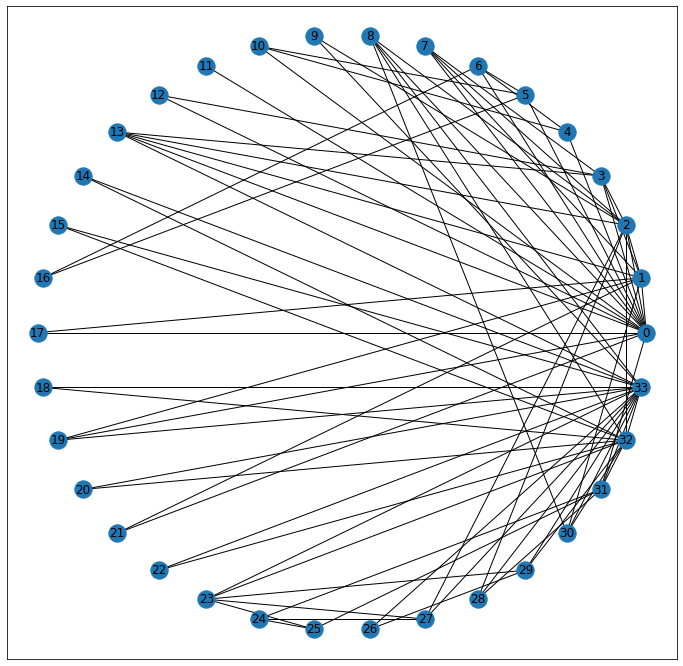

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(G, pos=pos)

Tightening that definition, a `trail` is a `walk` that never visits the same edge twice. Its length is guaranteed to be less than or equal to any other valid walk between two points, because if there was a revisited edge, we would just take whatever the final step off of that node would be, instead.

A `cycle` is a `trail` that begins and ends at the same place. Our earlier discussion of "completed triangles" is a great example of a `cycle`.

Tightening even further, a `path` is a `trail` that never visists the same node twice.

And finally, a `geodesic` is a two-dollar word meaning "shortest simple path." It has no redundant steps, and gets from point A to point B in the minimum number of steps. Here, we can see that there's a path that exists, connecting nodes `8` and `24`.

Moreover, we can use the built-in function `shortest_path` to determine what it is.

In [32]:
shortest_path = nx.shortest_path(G, 8, 24)
shortest_path

[8, 2, 27, 24]

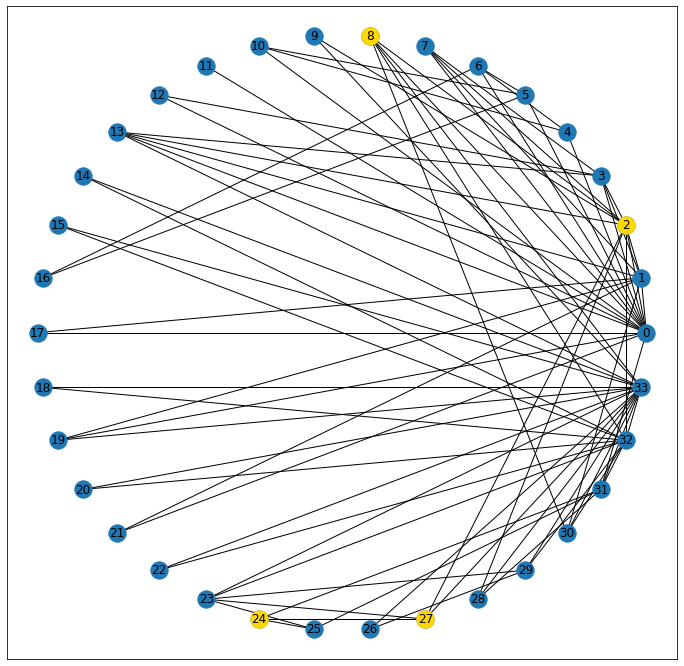

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=shortest_path, node_color='gold');

##  Graphs as Circles

*This part still throws me for a bit of a loop, but the book also concedes that it's a bit tricky to grok, so I'll try and be careful.*

Graph Networks borrow a lot of their descriptors from geometric terms used to describe circles. But before we get into that I want to define `node eccentricity` as a measure of how far from the normal/center node. Note that prefix-- `ecc`, interchangeable with the Latin `ex`, meaning "out", so taken literally, this means "measure of how far out from the center" a given node is.

In the graph context, this is expressed as the max distance from a node to all other nodes in the network, like so

In [34]:
print(nx.eccentricity(G))

{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}


Which should track.

If you'd describe someone as "eccentric" you'd likely also use the phrase "out there" which has a more literal interpretation here than I might have expected!

Where it gets confusing is borrowing the circle terminology.

`diameter` is the maximum `eccentricity` for a graph

In [35]:
max_ecc = max(nx.eccentricity(G).items(), key=lambda x:x[1])[1]

nx.diameter(G) == max_ecc

True

`radius` is the *minimum* `eccentricity` of a Graph

**Note**: and has no proportional relationship to the `diameter` whatsover!!

In [36]:
min_ecc = min(nx.eccentricity(G).items(), key=lambda x:x[1])[1]

nx.radius(G) == min_ecc

True

Using these terms, we'd say that the `center` of a graph, is a set of all nodes whose `eccentricity` is equal to the `radius`

In [37]:
center_nodes = nx.center(G)
center_nodes

[0, 1, 2, 3, 8, 13, 19, 31]

In [38]:
[nx.eccentricity(G, node) for node in center_nodes]

[3, 3, 3, 3, 3, 3, 3, 3]

Similarly, the `periphery` represents all nodes whose `eccentricity` is equal to the `diameter`

In [39]:
periphery_nodes = nx.periphery(G)
periphery_nodes

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [40]:
[nx.eccentricity(G, node) for node in periphery_nodes]

[5, 5, 5, 5, 5, 5, 5, 5, 5]